#### 의료인력data
- lineplot x축 : 시점, y축: 서울 의사 일반의

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [4]:
file = '시도별_의료인력_현황_20230414210524_dl2.csv'
pd_data = pd.read_csv(file, encoding ='cp949', header = [0,1,2])
pd_data.head()

시점    서울                 부산                대구              ...    인천  \
     시점    의사           간호사   의사          간호사   의사         간호사  ...   간호사   
     시점   일반의    전문의     소계  일반의   전문의     소계  일반의   전문의    소계  ...    소계   
0  2010   934  16102  28634  337  4698   9268  138  3370  6143  ...  4364   
1  2011  1067  17816  29804  376  5167  10144  152  3634  6458  ...  4689   
2  2012   863  18667  31194  371  5369  10212  135  3814  6458  ...  4815   
3  2013   863  19423  35179  347  5631  11547  142  3941  8189  ...  5476   
4  2014   848  19953  37660  360  5822  12660  139  4023  8502  ...  6500   

    광주               대전               울산              
    의사         간호사   의사         간호사   의사         간호사  
   일반의   전문의    소계  일반의   전문의    소계  일반의   전문의    소계  
0   91  2024  4538  149  2136  3874  110  1055  2192  
1  135  2225  5159  168  2248  4056  120  1163  2390  
2  128  2351  5123  159  2395  4127  103  1211  2410  
3  119  2451  5430  158  2477  4570  100  1252  2950  
4  130  2572  6147  158  2566  4709  110  1298  3214  

[5 rows x 22 columns]

/home/jjam/.local/lib/python3.10/site-packages/seaborn/relational.py:982: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (3 levels on the left, 1 on the right)
  g.data = pd.merge(


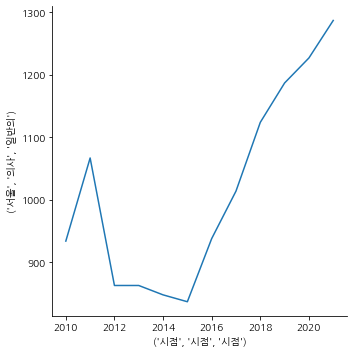

In [5]:
sns.relplot(data = pd_data, x = ('시점', '시점', '시점'), y = ('서울', '의사', '일반의'), kind = 'line')

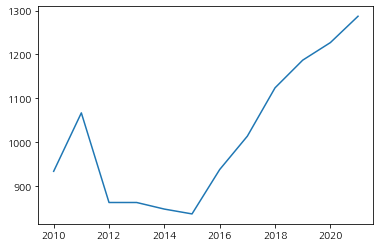

In [6]:
fig, axe = plt.subplots()
x = pd_data[('시점','시점','시점')]
y = pd_data[('서울', '의사', '일반의')]
axe.plot(x, y)

In [7]:
# 지역을 내릴 때 재배치가 안되었으면 하는 것들은 index로 밀어줘야한다.

df1 = pd_data.set_index(('시점', '시점', '시점')).stack(level = 0)

# 지역을 받아오기 위해 index를 level을 맞춰줘야 한다.
df1.index.names=['시점', '지역']
df1.columns = ['간호사', '일반의_의사', '전문의_의사']
df2 = df1.reset_index('지역')

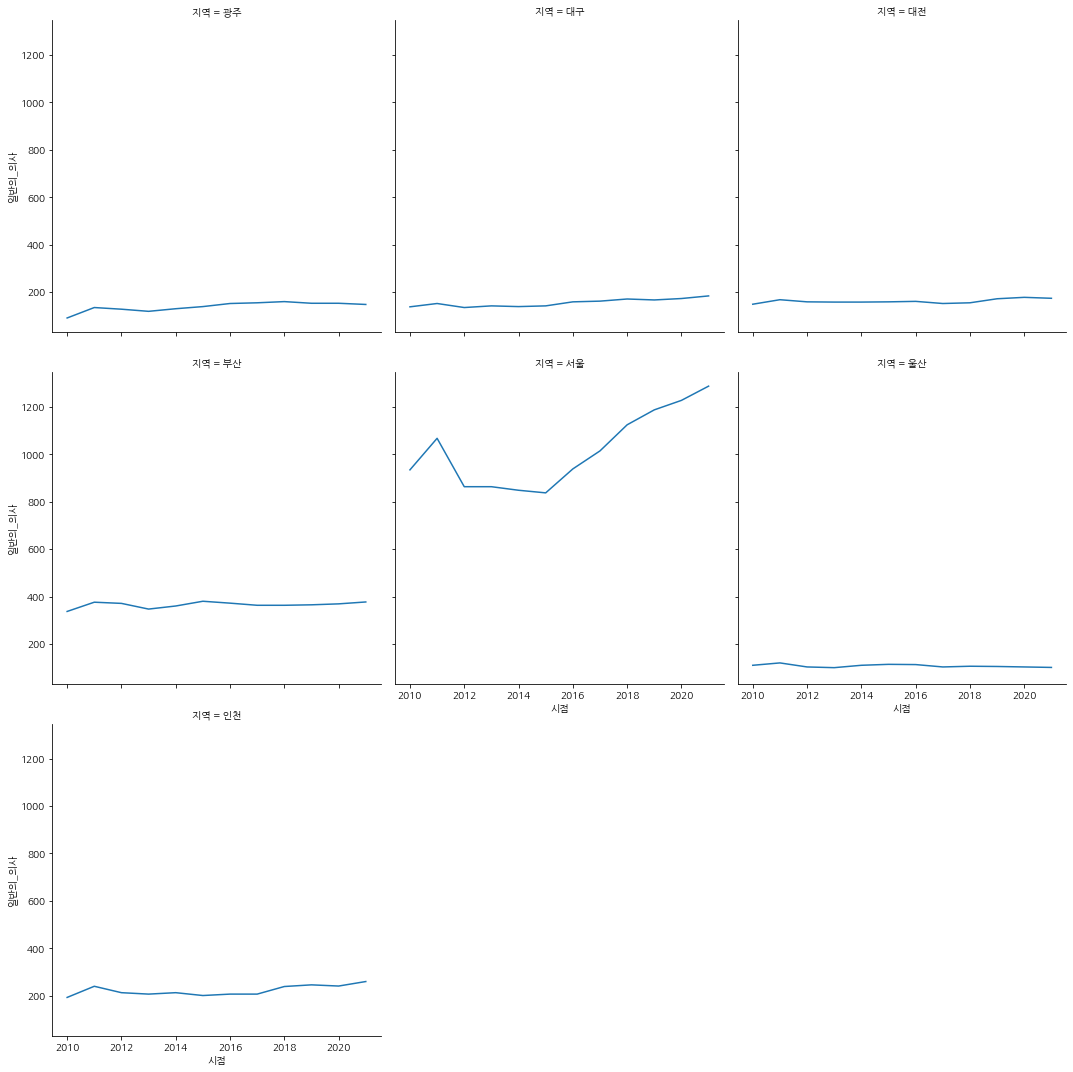

In [8]:
sns.relplot(data = df2, x = '시점', y = '일반의_의사', kind = 'line', col = '지역', col_wrap=3)

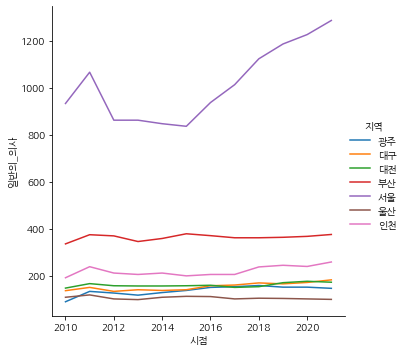

In [9]:
sns.relplot(data = df2, x = '시점', y = '일반의_의사', kind = 'line', hue = '지역')

In [10]:
df3 = df2.reset_index().set_index(['시점', '지역']).stack().reset_index()
df3.columns = ['시점', '지역', '근로자', '명수']
df3

,시점,지역,근로자,명수
0,2010,광주,간호사,4538
1,2010,광주,일반의_의사,91
2,2010,광주,전문의_의사,2024
3,2010,대구,간호사,6143
4,2010,대구,일반의_의사,138
...,...,...,...,...
247,2021,울산,일반의_의사,101
248,2021,울산,전문의_의사,1570
249,2021,인천,간호사,12656
250,2021,인천,일반의_의사,260


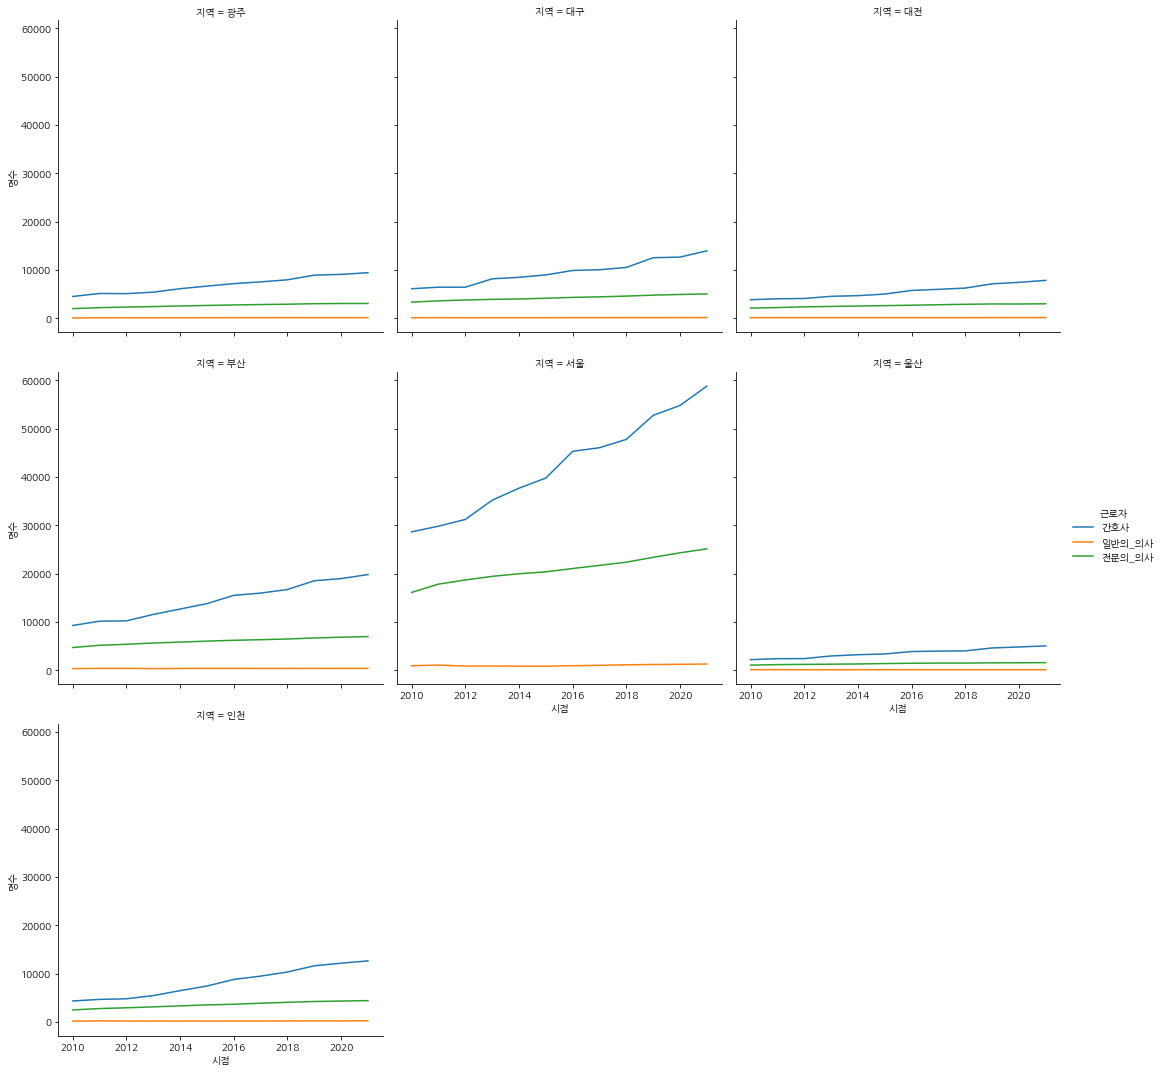

In [16]:
# ilneplot -> x:시점, y:명수 각 지역별 개별 plot
# 간호사/일반의_의사/전문의_의사 구분 -> hue'
sns.relplot(data = df3, x = '시점', y = '명수', kind = 'line', hue = '근로자', col = '지역', col_wrap = 3)